<a href="https://colab.research.google.com/github/pratyushgta/image-video-processing/blob/main/IVP_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

# EXPERIMENT 10


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

> **10.a.I EXTRACT FRAMES FROM VIDEO**

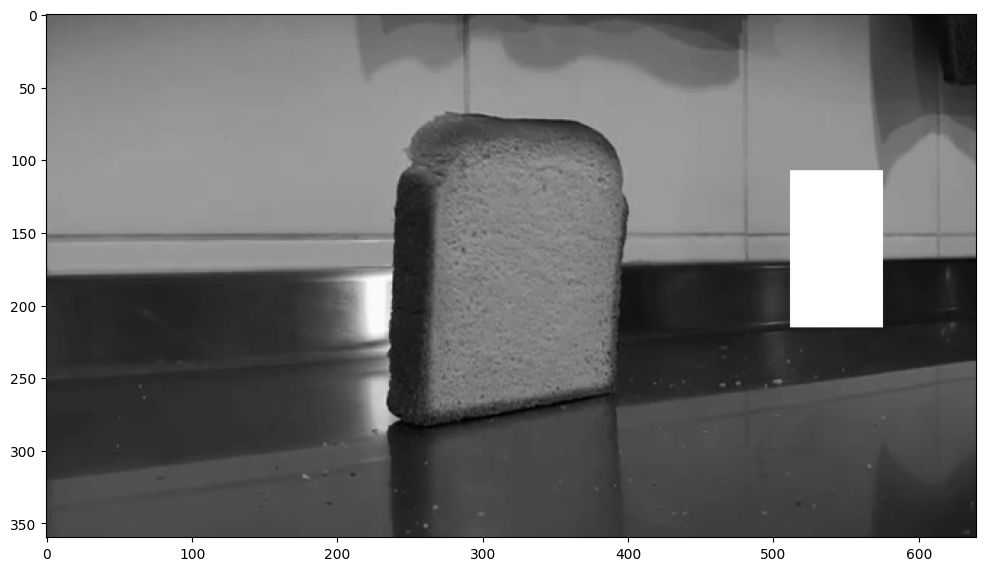

In [ ]:
# Open the Video file
cap= cv2.VideoCapture('bread.mp4')

# Check if the video file opened successfully
if not cap.isOpened():
    print("Could not open video file!")
    exit()

# Extract frames from video, modify some frames and save as video Frames
i=0
frames = []
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == False:
    break
    # Saving each frame as jpg image. Name of the frame starts with ‘abc’ and the frame number is appended
  cv2.imwrite('abc'+str(i)+'.jpg’', frame)
  i+=1
  frames.append(frame)


# At the end of loop, i is 900. therefore number of frames in video is last value of i
numb_frames=i

# modify some frames of video
strt_fr=int(numb_frames/3)
stp_fr=int(numb_frames*2/3)

# add white square in the frames to be modified
# use first frame to get the size of frames
img = cv2.imread('abc0.jpg',0)
sh=img.shape

# start and stop row and col numbers to include white square
strt_rw=int(sh[0]*3/10)
stp_rw=int(sh[0]*6/10)
strt_col=int(sh[1]*8/10)
stp_col=int(sh[1]*9/10)

# add white square to the chosen frames
for j in range(strt_fr,stp_fr):
  img = cv2.imread('abc'+str(j)+'.jpg',0)
  img[strt_rw:stp_rw,strt_col:stp_col]=255
  # replace original frame with the modified image/frame\
  cv2.imwrite('abc'+str(j)+'.jpg',img)

# release the video capture object
cap.release()
cv2.destroyAllWindows()

img.shape

plt.figure(figsize=(12,12))
plt.imshow(img,cmap='gray')

> **10.a.II. CREATE VIDEO FROM IMAGES**

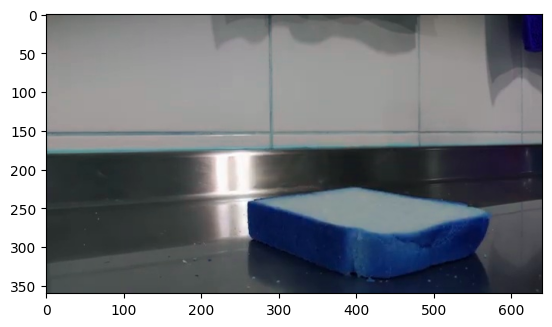

In [ ]:
#Create Video from Images
import glob

img_array = []
for filename in glob.glob('abc*.jpg'):
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter('test.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

for i in range(len(img_array)):
  out.write(img_array[i])

out.release()

plt.imshow(img_array[i])

> **10.b. EXTRACT FRAMES FROM VIDEO**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the video and save the frames in a list
vid=cv2.VideoCapture('bread.mp4')
# Create a list to store all the extracted frames
images=[]
#Read each frame in the video
while(vid.isOpened()):
  ret, frame = vid.read()
  #gray = cv2.cvtColor(frame, cv2.COLOR BGR2GRAY)
  if ret == False:
    break
  # saving each frame in images list
  images.append(frame)

vid.release()

In [ ]:
#Convert the list to numpy array
images=np.array(images)

# 150 color frames each of 288 rows, 352 columns
images.shape

(392, 360, 640, 3)

In [ ]:
#Extracting only the zeroth planes of the frames
images=images[:,:,:,0]
images.shape

(392, 360, 640)

In [ ]:
images[0].shape

(360, 640)

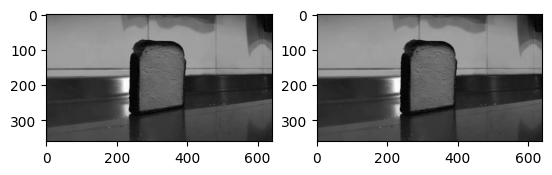

In [ ]:
def min_diff(ref_frame, curr_blk):
  rows,cols= ref_frame.shape #0Obtain the number of rows and column in the ref plane
  row_col=[] # array to store upper left corner pixel (row,col) of target block
  mse=[] # array to store difference between each target block and the ref block
  for r in range(0,rows//8):
    for c in range(0,cols//8):
      #tselect 8x8 subblock of the reference frame
      sub_blk= ref_frame[r*8: (r+1)*8, c*8:(c+1)*8]

      #Find mse between the current block and the subblock in the ref image
      error= np.square(sub_blk-curr_blk).mean(axis=None)
      mse.append(error)
      row_col.append((r*8,c*8))

  mse=np.array(mse)
  row_col= np.array(row_col)
  min_mse=mse.min()
  matched=np.where(mse==min_mse ) #obtain the index of minimum mse

  return min_mse, row_col[matched]

ref_frame= images[0] #First frame of the video which will be taken as a reference frame
curr_frame= images[1] #Second frame of the video for which motion vector has to be found out v

plt.subplot(1,2,1)
plt.imshow(images[0], cmap="gray")

plt.subplot(1,2,2)
plt.imshow(images[1], cmap="gray")

In [ ]:
# Knowing numbers of row and columns in the reference frame and current frame
print(ref_frame.shape)
print(curr_frame.shape)

(360, 640)
(360, 640)


In [ ]:
print("Enter coordinates of upper left corner pixel of the block in the current plane ")
p = int(input("Enter p: "))
q = int(input("Enter q: "))

#Extract the current block from the current frame for which the motion vector has to be obtained
curr_blk = curr_frame[p: (p+8), q:(q+8)]

mse, coordinates = min_diff(ref_frame, curr_blk)

Enter coordinates of upper left corner pixel of the block in the current plane 
Enter p: 100
Enter q: 120


In [ ]:
mse

0.0

In [ ]:
coordinates.shape

(85, 2)

In [ ]:
coordinates[0]

array([ 56, 384])

In [ ]:
curr_blk.shape

(8, 8)

In [ ]:
# top left corner coordinates of the matching block with minimum in the reference frame
x = coordinates[0, 0]  # x coordinate of the matching block in the reference plane
y = coordinates[0, 1]  # y coordinate of the matching block in the reference plane
print("Top left corner coordinates of the matching block with mean square error of {} are ({}, {})".format(mse, x, y))

Top left corner coordinates of the matching block with mean square error of 0.0 are (56, 384)


In [ ]:
# printing current block pixel value
print(curr_blk)

[[158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]]


In [ ]:
# printing pixel value of the block in the ref frame
print(ref_frame[x:x+8, y:y+8])

[[158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]
 [158 158 158 158 158 158 158 158]]


In [ ]:
# Obtain motion vector
# reference coordinates - current coordinates
mv=[x-p,y-q]
print("Motion verctor between the matching block in the ref frame with the current block is",mv)

Motion verctor between the matching block in the ref frame with the current block is [-44, 264]
